In [1]:
# importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
# Reading the file into jupter notebook for inspection
pd.read_csv(r'C:\Users\Chaitra.b.c\Desktop\Data Anaytics\Dataset\6052.csv')

,Date,country,"3 month interbank rate - Level, ratio or index","Broad money, s.a. - Growth on the same period of the previous year","Broad money, s.a. - Growth previous period","Broad money, s.a. - Level, ratio or index","Construction, s.a. - Growth on the same period of the previous year","Construction, s.a. - Growth previous period","Construction, s.a. - Level, ratio or index","Consumer confidence indicator, s.a. - Level, ratio or index",...,"Retail trade (Volume), s.a. - Growth on the same period of the previous year","Retail trade (Volume), s.a. - Growth previous period","Retail trade (Volume), s.a. - Level, ratio or index",Share prices - Growth on the same period of the previous year,Share prices - Growth previous period,"Total employment: all persons, s.a. - Growth previous period","Total employment: all persons, s.a. - Level, ratio or index","Total manufacturing, s.a. - Growth on the same period of the previous year","Total manufacturing, s.a. - Growth previous period","Total manufacturing, s.a. - Level, ratio or index"
0,1990-01-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36770,2022-11-01,United States,4.46,0.283823,-0.223110,177.471337,10.515490,1.766866,164.742912,61.113602,...,-2.025264,-1.406143,119.821630,-11.161450,7.662672,NaN,158527.0,0.755197,-0.684145,99.808062
36771,2022-12-01,United States,4.51,-1.044992,-0.240450,177.044607,9.366977,-0.097104,164.582940,64.233838,...,-1.332838,-1.187625,118.398598,-8.990353,0.775607,NaN,159244.0,-1.089430,-1.880140,97.931530
36772,2023-01-01,United States,4.61,-1.754947,-0.664472,175.868195,6.881909,0.375305,165.200627,69.828746,...,-0.873949,2.282188,121.100676,-7.009658,2.671263,NaN,160138.0,0.884830,1.419296,99.321468
36773,2023-02-01,United States,4.74,-2.354163,-0.571199,174.863637,5.189710,-0.070554,165.084072,72.088227,...,-1.409206,-0.362554,120.661620,-4.530222,0.830646,NaN,160315.0,-0.194436,0.086190,99.407074


In [4]:
# Creating a Dataframe to store the data of the csv file
oced_df = pd.read_csv(r'C:\Users\Chaitra.b.c\Desktop\Data Anaytics\Dataset\6052.csv',
                     parse_dates = [0]);

In [5]:
# displaying the basic information of the dataset.
oced_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 52 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Date                                                                                   36775 non-null  datetime64[ns]
 1   country                                                                                36775 non-null  object        
 2   3 month interbank rate - Level, ratio or index                                         18624 non-null  float64       
 3   Broad money, s.a. - Growth on the same period of the previous year                     14598 non-null  float64       
 4   Broad money, s.a. - Growth previous period                                             15661 non-null  float64       
 5   Broad money, s.a. - Level

In [6]:
# displaying useful statistics
oced_df.describe()

,"3 month interbank rate - Level, ratio or index","Broad money, s.a. - Growth on the same period of the previous year","Broad money, s.a. - Growth previous period","Broad money, s.a. - Level, ratio or index","Construction, s.a. - Growth on the same period of the previous year","Construction, s.a. - Growth previous period","Construction, s.a. - Level, ratio or index","Consumer confidence indicator, s.a. - Level, ratio or index",Consumer prices: all items - Growth on the same period of the previous year,Consumer prices: all items - Growth previous period,...,"Retail trade (Volume), s.a. - Growth on the same period of the previous year","Retail trade (Volume), s.a. - Growth previous period","Retail trade (Volume), s.a. - Level, ratio or index",Share prices - Growth on the same period of the previous year,Share prices - Growth previous period,"Total employment: all persons, s.a. - Growth previous period","Total employment: all persons, s.a. - Level, ratio or index","Total manufacturing, s.a. - Growth on the same period of the previous year","Total manufacturing, s.a. - Growth previous period","Total manufacturing, s.a. - Level, ratio or index"
count,18624.000000,14598.000000,15661.000000,15691.000000,12136.000000,12739.000000,13877.000000,14513.000000,31219.000000,31624.000000,...,19904.000000,20333.000000,20951.000000,23261.000000,24169.000000,898.000000,4762.000000,23267.000000,23792.000000,25328.000000
mean,6.144117,14.536099,1.076145,42.986941,2.634842,0.462023,93.534816,2.830978,16.373158,0.774842,...,2.384951,0.219605,81.098248,80.887390,1.208707,0.160655,39019.163670,3.327982,0.303962,75.518786
std,7.855906,21.415082,1.415263,43.645035,39.333922,9.488811,35.073724,33.603682,133.126522,2.605127,...,5.901676,2.723091,25.765166,3241.355549,41.871818,0.920741,40468.220751,8.074478,3.413271,31.652868
min,-0.880000,-25.072276,-43.275404,0.000061,-98.643937,-97.940953,1.745911,-80.800000,-17.796610,-13.131616,...,-76.875769,-68.178646,19.678037,-91.801307,-55.932203,-15.708847,1747.588759,-66.319798,-56.305267,3.466662
25%,1.490000,6.348194,0.420168,5.989731,-3.239961,-1.293889,76.580540,-14.400000,1.923077,0.000000,...,-0.184281,-0.660066,58.984351,-5.990941,-1.966788,-0.071044,8584.185919,-0.433188,-0.917514,52.468170
50%,4.470000,10.057690,0.829064,27.043314,2.030137,0.186906,96.865441,-5.600000,3.856041,0.328782,...,2.256555,0.213447,85.199373,8.262024,0.855746,0.146468,19745.952385,3.047091,0.277228,80.855336
75%,8.287500,16.824180,1.430835,73.735215,6.677886,1.608011,109.373993,3.800000,8.525973,0.788690,...,4.950045,1.094891,100.216703,24.483998,3.579150,0.422960,63817.500000,6.967222,1.445468,99.820036
max,160.000000,500.356543,28.718920,228.070595,3919.544162,545.694124,331.627636,127.000000,6821.311543,87.566810,...,85.805355,68.850476,176.700000,269360.058715,6436.828853,5.930579,160892.000000,198.724061,97.575636,219.381718


In [7]:
# A dataframe to store the countof null and not null values and the percentages

miss_df = pd.DataFrame(pd.Series(oced_df.columns), columns = ['Columns'])

# Not null column
miss_df['not_null_values'] = pd.Series(len(oced_df) - oced_df.isna().sum().values)

# null column
miss_df['null_values'] = pd.Series(oced_df.isna().sum().values)

# Not null percentage
miss_df['not_null_prc'] = pd.Series(((len(oced_df) - oced_df.isna().sum().values)/len(oced_df))*100)

# Null percentage
miss_df['null_prc'] = pd.Series((oced_df.isna().sum().values/len(oced_df))*100)

# validate
miss_df

,Columns,not_null_values,null_values,not_null_prc,null_prc
0,Date,36775,0,100.000000,0.000000
1,country,36775,0,100.000000,0.000000
2,"3 month interbank rate - Level, ratio or index",18624,18151,50.643100,49.356900
3,"Broad money, s.a. - Growth on the same period ...",14598,22177,39.695445,60.304555
4,"Broad money, s.a. - Growth previous period",15661,21114,42.585996,57.414004
5,"Broad money, s.a. - Level, ratio or index",15691,21084,42.667573,57.332427
6,"Construction, s.a. - Growth on the same period...",12136,24639,33.000680,66.999320
7,"Construction, s.a. - Growth previous period",12739,24036,34.640381,65.359619
8,"Construction, s.a. - Level, ratio or index",13877,22898,37.734874,62.265126
9,"Consumer confidence indicator, s.a. - Level, r...",14513,22262,39.464310,60.535690


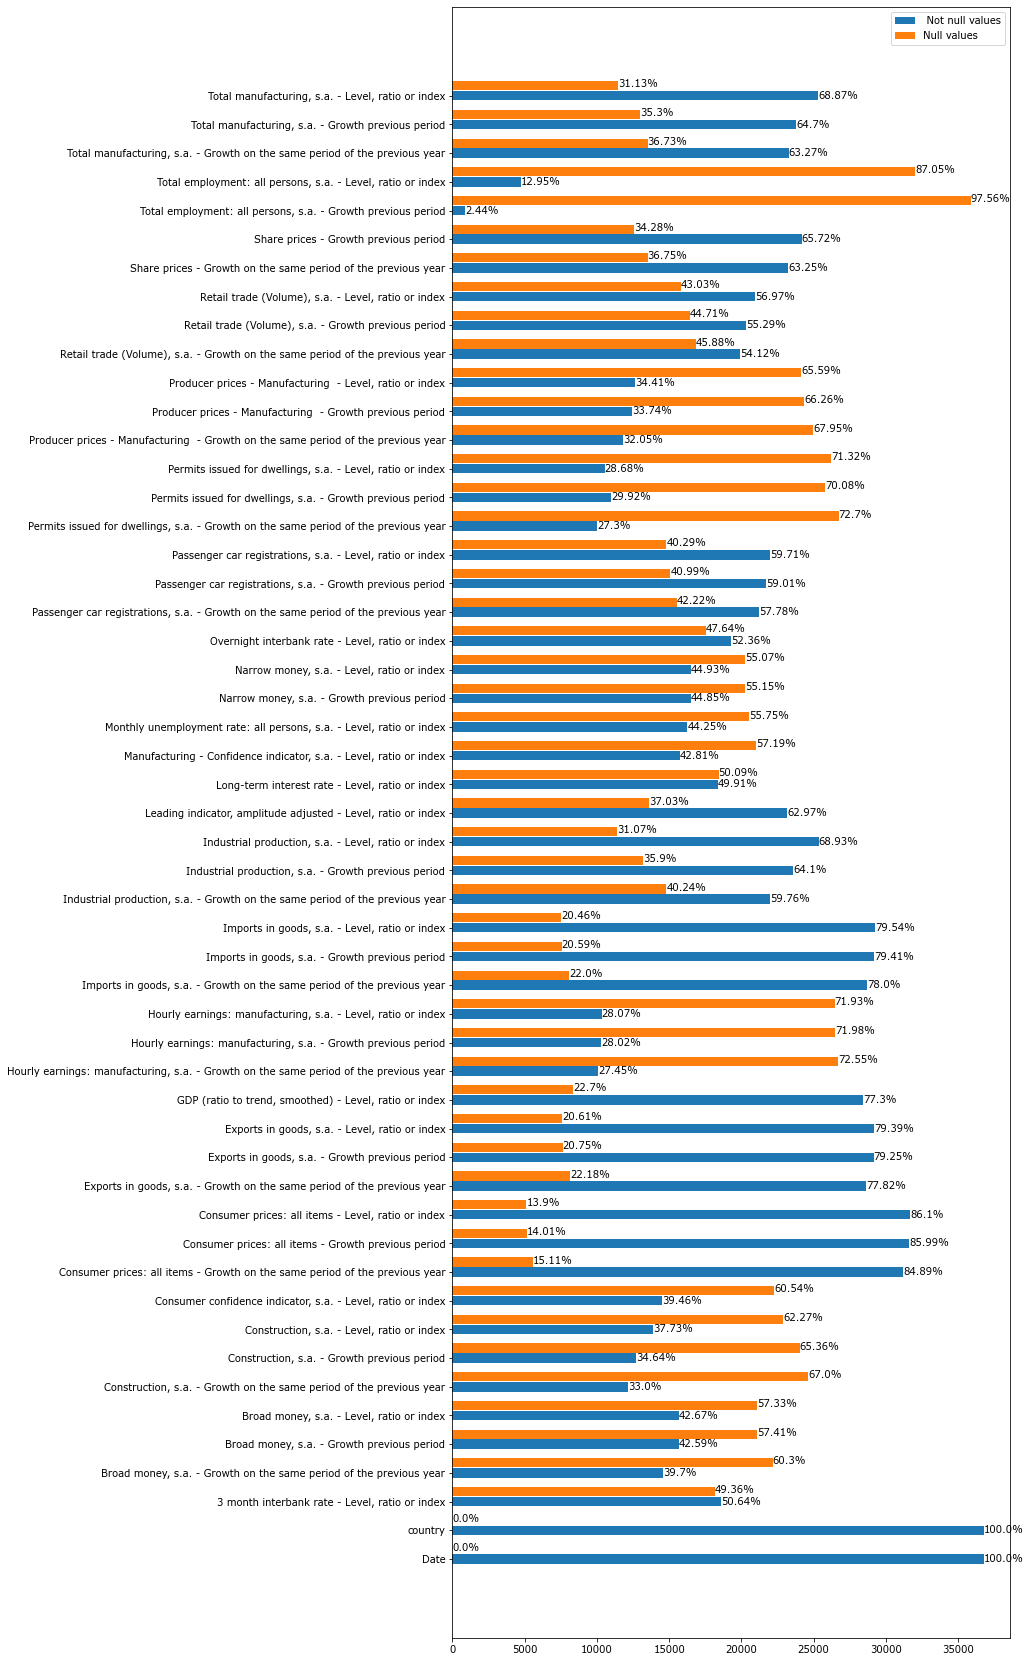

In [21]:
# Visualizing the missing data and showing percentages.

# setting the plot size
plt.figure(figsize = (10,30))

# Horizontal Bar Plots
plt.barh(width = miss_df['not_null_values'], y = miss_df['Columns'].index,  height = 0.33, label = ' Not null values')
plt.barh(width = miss_df['null_values'], y = miss_df['Columns'].index + 0.35, height = 0.32, label = 'Null values')

# display the percentage text appropriately
for i,j in enumerate(zip(miss_df['not_null_values'],miss_df['null_values'],miss_df['not_null_prc'],miss_df['null_prc'])):
    plt.text(y = i - 0.1, x = j[0], s = str(np.round(j[2],2)) + '%')
    plt.text(y = i + 0.3, x = j[1], s = str(np.round(j[3],2)) + '%')

# replacing numeric values with Column names accordingly
plt.yticks(ticks = range(0,len(oced_df.columns)), labels = list(oced_df.columns))
plt.legend()
plt.show()

In [30]:
# Segregating the columns into numerical, Categorical, Date.
numerical_features = oced_df.dtypes[(oced_df.dtypes != 'object') &  (oced_df.dtypes != 'datetime64[ns]')].index
categorical_features = oced_df.dtypes[oced_df.dtypes =='object'].index
date_features = oced_df.dtypes[oced_df.dtypes == 'datetime64[ns]']

#print(numerical_features)
#print(categorical_features)
#print(date_features)

Index(['3 month interbank rate - Level, ratio or index',
       'Broad money, s.a. - Growth on the same period of the previous year',
       'Broad money, s.a. - Growth previous period',
       'Broad money, s.a. - Level, ratio or index',
       'Construction, s.a. - Growth on the same period of the previous year',
       'Construction, s.a. - Growth previous period',
       'Construction, s.a. - Level, ratio or index',
       'Consumer confidence indicator, s.a. - Level, ratio or index',
       'Consumer prices: all items - Growth on the same period of the previous year',
       'Consumer prices: all items - Growth previous period',
       'Consumer prices: all items - Level, ratio or index',
       'Exports in goods, s.a. - Growth on the same period of the previous year',
       'Exports in goods, s.a. - Growth previous period',
       'Exports in goods, s.a. - Level, ratio or index',
       'GDP (ratio to trend, smoothed) - Level, ratio or index',
       'Hourly earnings: manufactur

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'3 month interbank rate - Level, ratio or index'}>,
        <AxesSubplot:title={'center':'Broad money, s.a. - Growth on the same period of the previous year'}>,
        <AxesSubplot:title={'center':'Broad money, s.a. - Growth previous period'}>,
        <AxesSubplot:title={'center':'Broad money, s.a. - Level, ratio or index'}>,
        <AxesSubplot:title={'center':'Construction, s.a. - Growth on the same period of the previous year'}>,
        <AxesSubplot:title={'center':'Construction, s.a. - Growth previous period'}>],
       [<AxesSubplot:title={'center':'Construction, s.a. - Level, ratio or index'}>,
        <AxesSubplot:title={'center':'Consumer confidence indicator, s.a. - Level, ratio or index'}>,
        <AxesSubplot:title={'center':'Consumer prices: all items - Growth on the same period of the previous year'}>,
        <AxesSubplot:title={'center':'Consumer prices: all items - Growth previous p

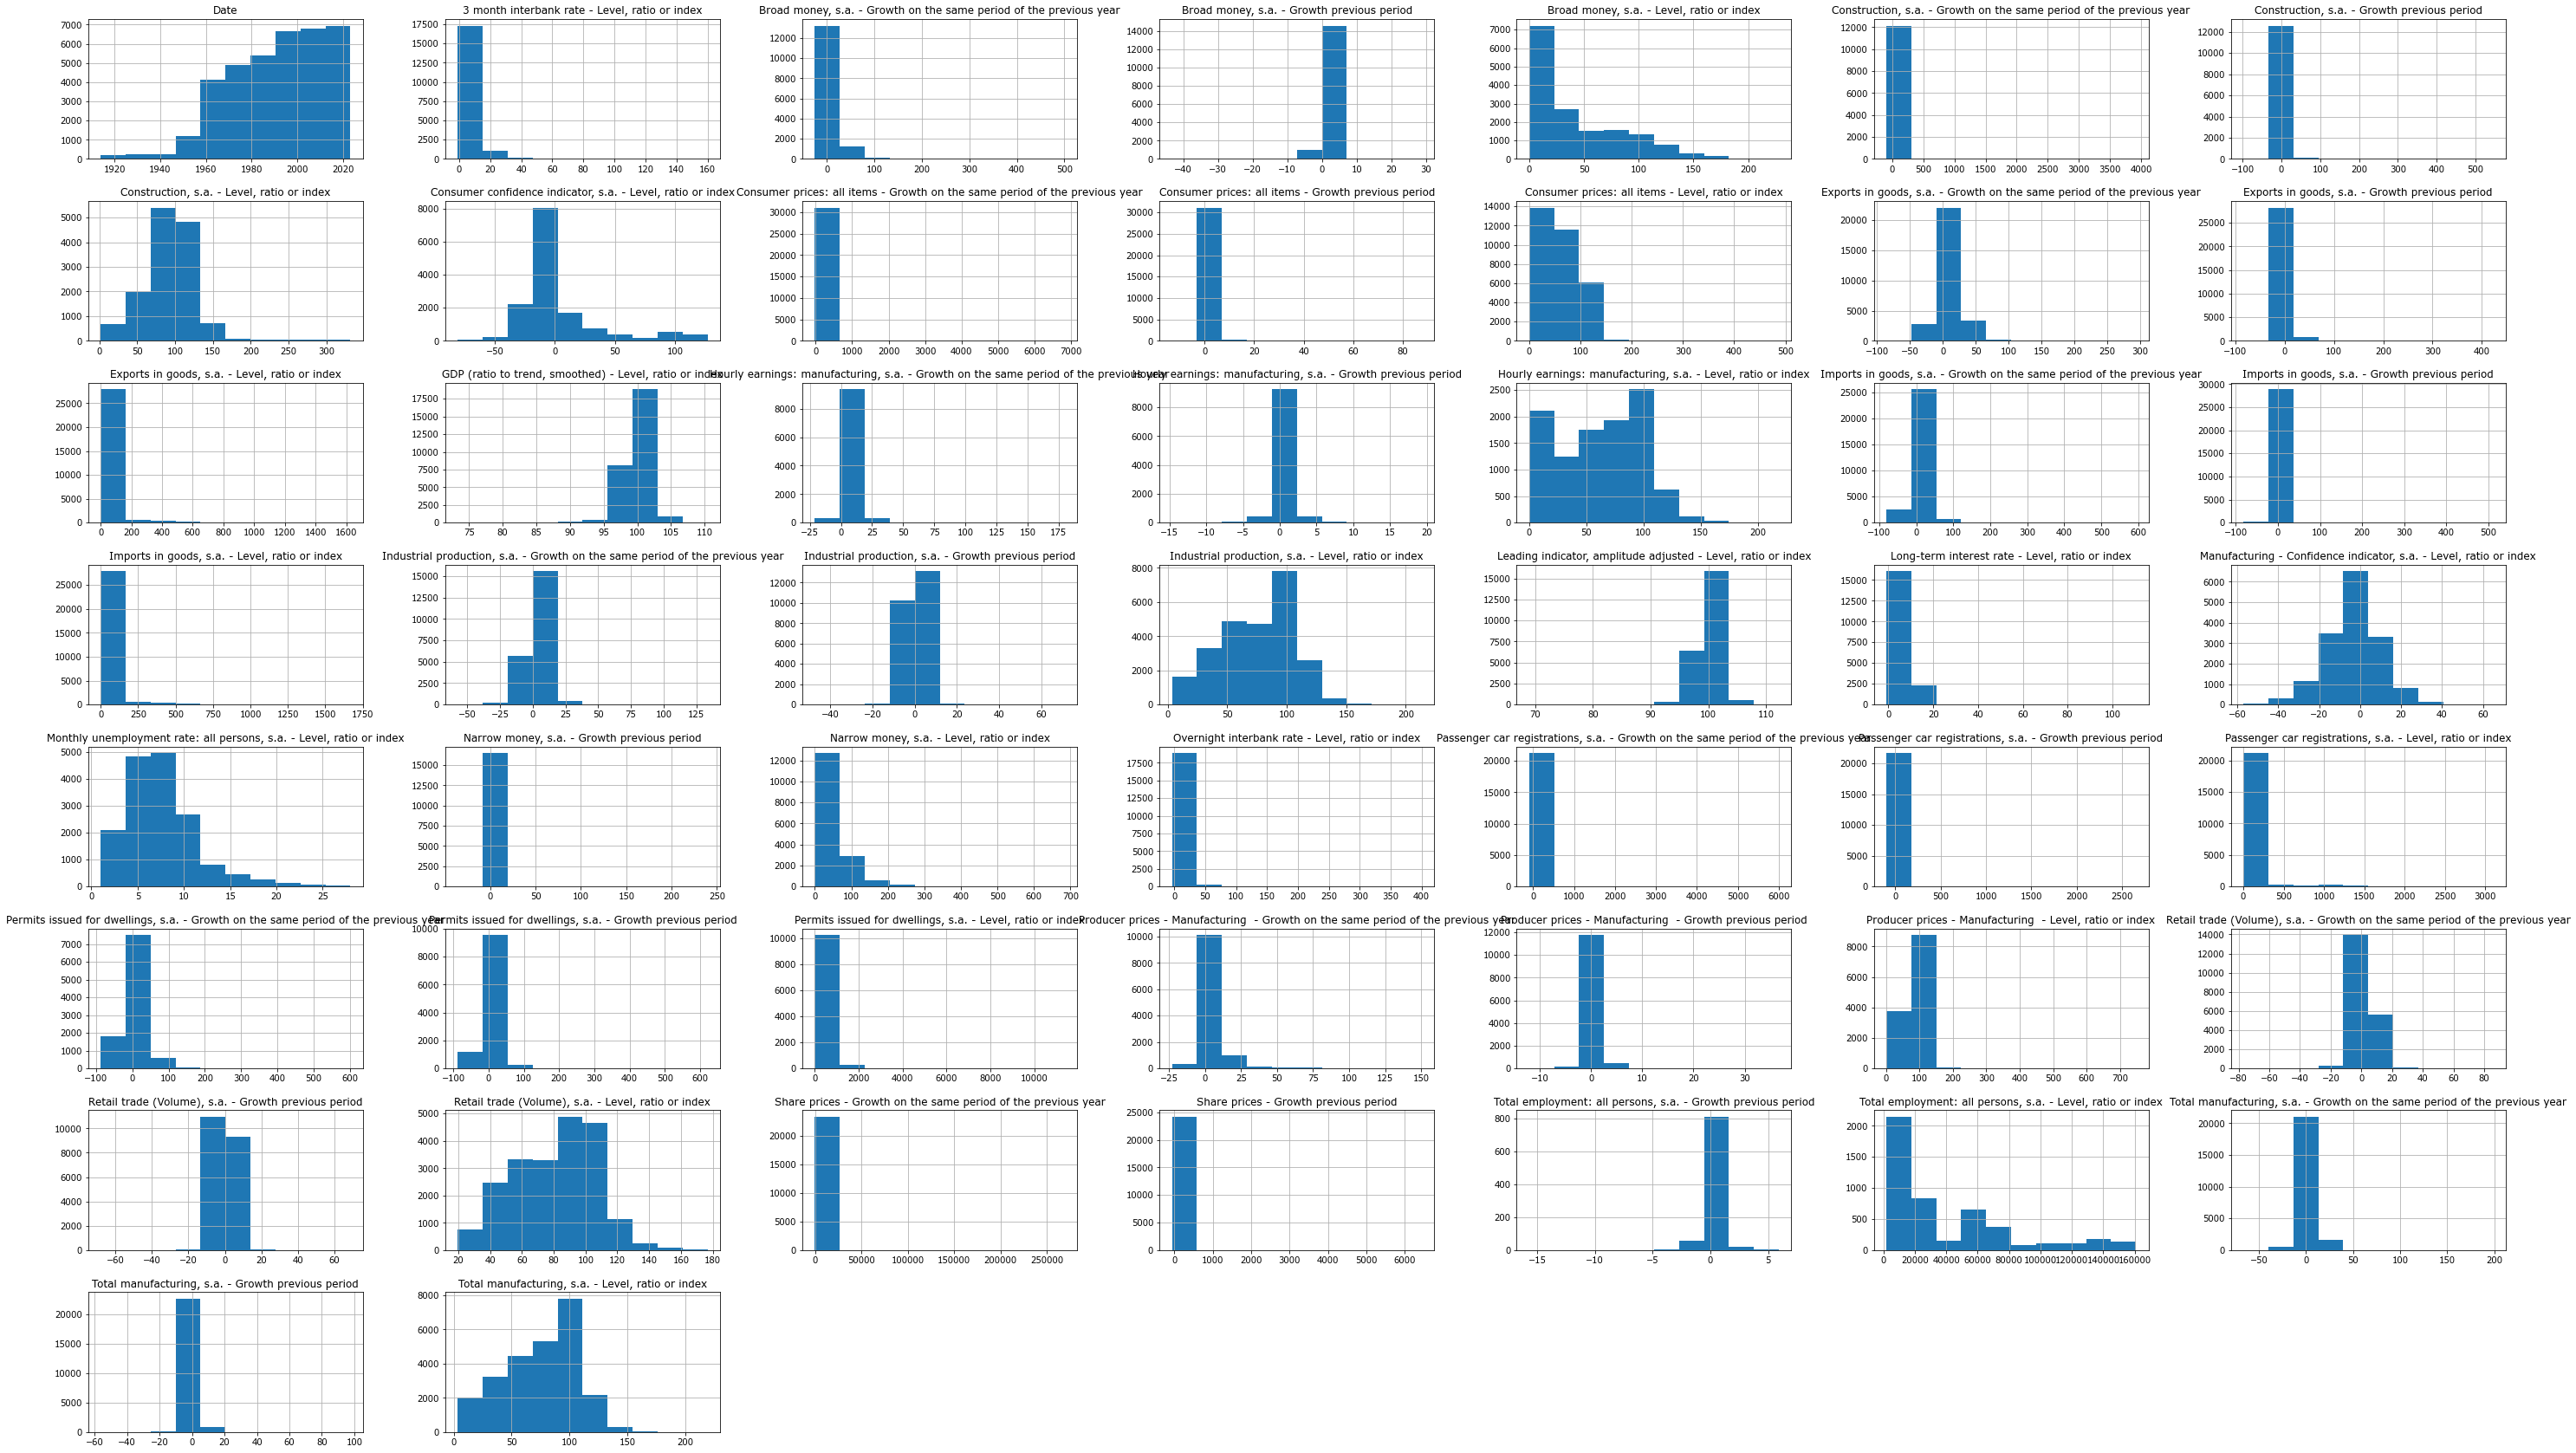

In [42]:
# histogram plot for all the numerical columns
oced_df.hist(xlabelsize = 10, ylabelsize = 10, figsize =(50,30))

In [89]:
# DataFrame for correlation between columns

# stack is used to fetch those values where the cell is not null
df_corr = oced_df.corr().stack().reset_index()

# changing the column names
df_corr.columns = ['Col1', 'Col2', 'Correlation_Coefficient']

# filtering the values where corrCoeff is higher and resetting the index .
df_corr_05 = df_corr[(df_corr['Correlation_Coefficient'] > 0.5) & (df_corr['Correlation_Coefficient'] != 1.00)].reset_index(drop = True)

# validate
df_corr_05

,Col1,Col2,Correlation_Coefficient
0,"3 month interbank rate - Level, ratio or index","Broad money, s.a. - Growth on the same period ...",0.749277
1,"3 month interbank rate - Level, ratio or index",Consumer prices: all items - Growth on the sam...,0.829300
2,"3 month interbank rate - Level, ratio or index",Consumer prices: all items - Growth previous p...,0.533389
3,"3 month interbank rate - Level, ratio or index","Hourly earnings: manufacturing, s.a. - Growth ...",0.660935
4,"3 month interbank rate - Level, ratio or index","Long-term interest rate - Level, ratio or index",0.786712
...,...,...,...
153,"Total manufacturing, s.a. - Level, ratio or index","Hourly earnings: manufacturing, s.a. - Level, ...",0.866417
154,"Total manufacturing, s.a. - Level, ratio or index","Industrial production, s.a. - Level, ratio or ...",0.980690
155,"Total manufacturing, s.a. - Level, ratio or index","Narrow money, s.a. - Level, ratio or index",0.604234
156,"Total manufacturing, s.a. - Level, ratio or index","Producer prices - Manufacturing - Level, rati...",0.576639


In [182]:
# Get group by column name and column value
grp = oced_df.groupby(['country']).get_group('Argentina')

In [183]:
# validate
grp

,Date,country,"3 month interbank rate - Level, ratio or index","Broad money, s.a. - Growth on the same period of the previous year","Broad money, s.a. - Growth previous period","Broad money, s.a. - Level, ratio or index","Construction, s.a. - Growth on the same period of the previous year","Construction, s.a. - Growth previous period","Construction, s.a. - Level, ratio or index","Consumer confidence indicator, s.a. - Level, ratio or index",...,"Retail trade (Volume), s.a. - Growth on the same period of the previous year","Retail trade (Volume), s.a. - Growth previous period","Retail trade (Volume), s.a. - Level, ratio or index",Share prices - Growth on the same period of the previous year,Share prices - Growth previous period,"Total employment: all persons, s.a. - Growth previous period","Total employment: all persons, s.a. - Level, ratio or index","Total manufacturing, s.a. - Growth on the same period of the previous year","Total manufacturing, s.a. - Growth previous period","Total manufacturing, s.a. - Level, ratio or index"
0,1990-01-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022-11-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,2022-12-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,2023-01-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,2023-02-01,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
